In [433]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
%matplotlib inline

In [434]:
n = 100
N = 10000

Запишем статистику байесовского критерия для проверки гипотезы $H_0 : X \sim N(0, \sigma)$ vs $H_1 : X \sim Laplace(\theta)$ в явном виде:
$$K = \frac{\int_{-\infty}^{\infty} \left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right)^n e^{-\frac{\sum_{i=1}^n X_i^2}{2 \sigma^2}} e^{-\sigma} I(\sigma > 0)d\sigma}{\int_{-\infty}^{\infty} \left(\frac{1}{2 \theta}\right)^n e^{-\frac{\sum_{i=1}^n \left|X_i\right|}{\theta}} e^{-\theta} I(\theta > 0)d\theta} = 
\frac{\int_{0}^{\infty} \left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right)^n e^{-\frac{\sum_{i=1}^n X_i^2}{2 \sigma^2}} e^{-\sigma}d\sigma}{\int_{0}^{\infty} \left(\frac{1}{2 \theta}\right)^n e^{-\frac{\sum_{i=1}^n \left|X_i\right|}{\theta}} e^{-\theta}d\theta}.$$
В данном случае априорные распределения $\sigma$ и $\theta$ - это стандартные экспоненциальные распределения.

Построим критерий уровня значимости $\alpha = 0.05$ с помощью моделирования. Для этого сгенерируем $N = 10000$ выборок размера $n=100$, каждая из которых генерируется из нормального рапсределения с параметрами 0 и $\sigma$, где $\sigma$ берется из априорного стандартного экспоненциального распределения.

Сначала сгенерируем $N=10000$ параметров $\sigma$ из стандартного эскпоненциального распределения:

In [435]:
exp_rv = sts.expon(1)
sigmas = exp_rv.rvs(size=N)

Создадим функции, которые считают подынтегральные выражения нашей статистики $K$:

In [436]:
def f0(sigma, sample):
    return ((1 / (2 * np.pi * (sigma ** 2))) ** 0.5) ** len(sample) \
        * np.exp(-np.sum(sample ** 2) / (2 * (sigma ** 2))) * np.exp(-sigma)

In [437]:
def f1(theta, sample):
    return (1 / (2 * theta)) ** len(sample) \
        * np.exp(-np.sum(np.abs(sample)) / theta) * np.exp(-theta)

Для каждого параметра $\sigma$ сгенерим выборку из $N(0, \sigma)$ и посчитаем значение статистики $K$:

In [438]:
K = np.zeros(N)
for i, sigma in enumerate(sigmas):
    norm_rv = sts.norm(loc=0, scale=sigma**0.5)
    sample = norm_rv.rvs(n)
    K[i] = quad(f0, 0, np.inf, args=(sample,))[0] / \
    quad(f1, 0, np.inf, args=(sample,))[0]

Посмотрим на эмпирическое распределение статистики $K$ и найдем такое $k_{0.05}$, что $P(K \leqslant k_{0.05}) = \alpha = 0.05$ при верной $H_0$. Для этого отсортируем все значения статистики $K$ и посмотрим на $N \cdot 0.05 = 500$ элемент. Он и будет равен $k_{0.05}$ 

k_0.05 =  1.2039135351449521


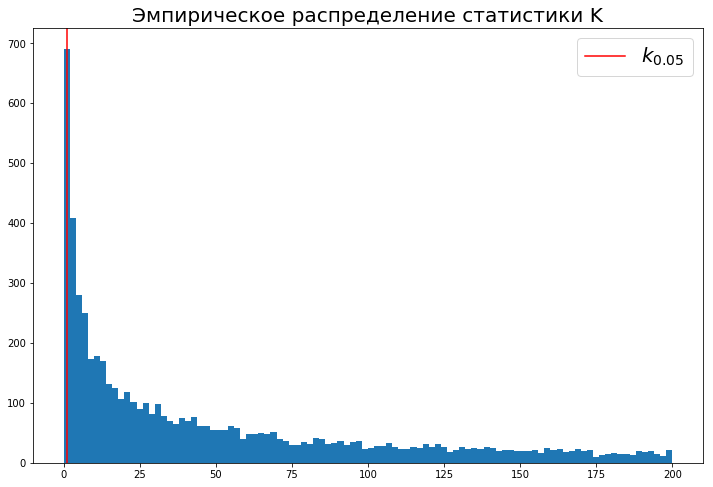

In [439]:
plt.figure(figsize=(12, 8))
plt.hist(K, bins=100, range=(0, 200));
K = sorted(K)
k = K[int(N * 0.05) - 1]
print("k_0.05 = ", k)
plt.axvline(x=k, color="red", label=r"$k_{0.05}$");
plt.title("Эмпирическое распределение статистики K", fontsize=20)
plt.legend(prop={'size': 20});

Таким образом получаем критерий:
$$S = \{K \leqslant 1.204\}.$$
Можно сказать, что чем больше значение статистики $K$, тем выборка более похожа на нормальное распределение, чем на распределение Лапласа.

Посмотрим значение данной статистики на нашей выборке.

In [440]:
sample = np.load('9-3.npy')
len(sample)

100

In [441]:
print("K = ", quad(f0, 0, np.inf, args=(sample,))[0] \
      / quad(f1, 0, np.inf, args=(sample,))[0])

K =  14311.948632273956


Как мы видим значение статистики очень велико, следовательно мы принимаем гипотезу $H_0$.

Интересно так же наглядно сравнить распределение выборки с, к примеру, плотностями стандартных распределений нормального и Лапласа.

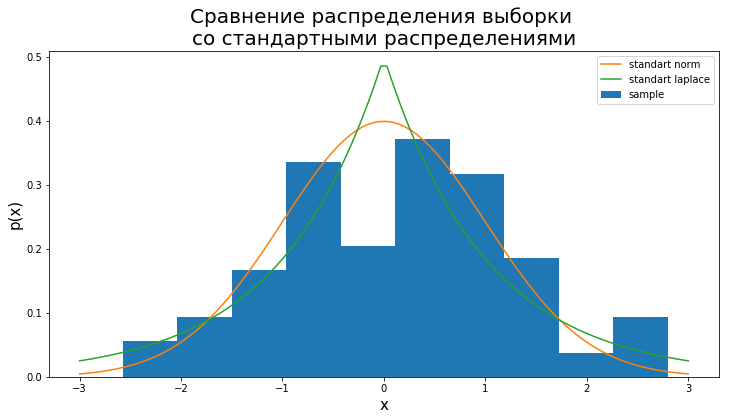

In [442]:
plt.figure(figsize=(12, 6))
plt.hist(sample, density=True, label="sample");
x = np.linspace(-3, 3, 100)
plt.plot(x, sts.norm.pdf(x), label="standart norm")
plt.plot(x, sts.laplace.pdf(x), label="standart laplace")
plt.xlabel("x", fontsize=15)
plt.ylabel("p(x)", fontsize=15)
plt.title("""Сравнение распределения выборки 
со стандартными распределениями""", fontsize=20)
plt.legend();

Как мы видим, данные распределения довольно похожи, поэтому на взгляд, не использовав, какие либо методы проверок гипотез очень сложно определить из какого распределения взята наша выборка.

Вывод: с помощью байесовского подхода к проверке гипотез мы смогли проверить гипотезу о распределении выборки. В нашем случае мы приняли гипотезу о том, что наша выборка имеет распределение $N(0, \sigma)$, так как значение статистики было очень большим, а данная статистика по сути и показывает на сколько данная выборка больше похожа на выборку с нормальным распределением, чем с распределением Лапласа.